<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Обучим-базовую-линейную-регрессию" data-toc-modified-id="Обучим-базовую-линейную-регрессию-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обучим базовую линейную регрессию</a></span></li><li><span><a href="#Метрики-качества-в-задаче-регрессии" data-toc-modified-id="Метрики-качества-в-задаче-регрессии-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Метрики качества в задаче регрессии</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Изучение-зависимостей-целевой-переменной-от-признаков" data-toc-modified-id="Изучение-зависимостей-целевой-переменной-от-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изучение зависимостей целевой переменной от признаков</a></span></li><li><span><a href="#Изучение-попарных-зависимостей---полиномиальные-признаки" data-toc-modified-id="Изучение-попарных-зависимостей---полиномиальные-признаки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Изучение попарных зависимостей - полиномиальные признаки</a></span></li></ul></li></ul></div>

# Введение в машинное обучение. Задача регрессии


Цели ноутбука:

* Научиться обучать линейную регрессию и оценивать ее качество

Будем обучать регрессию для прогнозирования возраста крабов по их различным характеристикам!

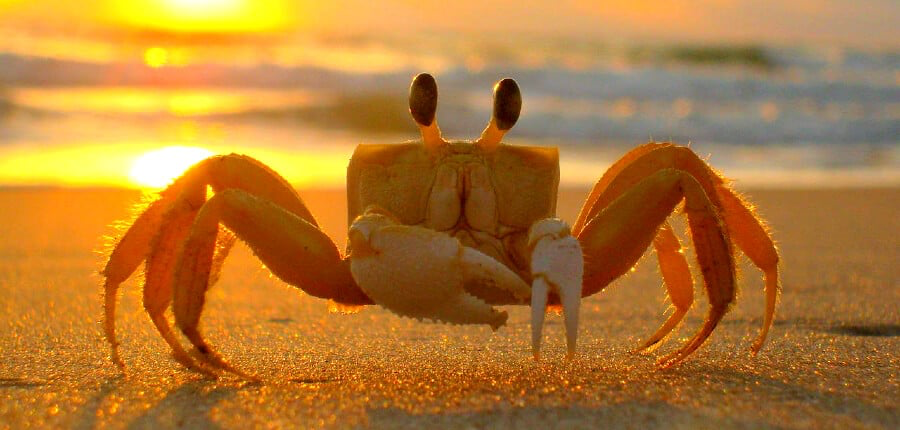

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# игнорируем предупреждения
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CrabeAge.csv")

Описание данных (из оригинального источника):

* `Sex`	(object) - пол краба (Male, Female, Intermediate)
* `Length` (float) - длина краба, в футах 
* `Diameter` (float) - диаметр, в футах 
* `Height` (float) - высота краба, в футах 
* `Weight` (float) - вес краба, в унциях
* `Shucked Weight` (float) - вес без панциря, в унциях
* `Viscera Weight` (float) - масса глубоких органов брюшной полости, в унциях
* `Shell Weight` (float) - вес панциря, в унциях
* `Age`	(int)	- возраст краба, в месяцах

In [3]:
# первые 5 строк датасета
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
# Общая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


## Исследование данных

In [5]:
# Изучим распределение по полу краба
df['Sex'].value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

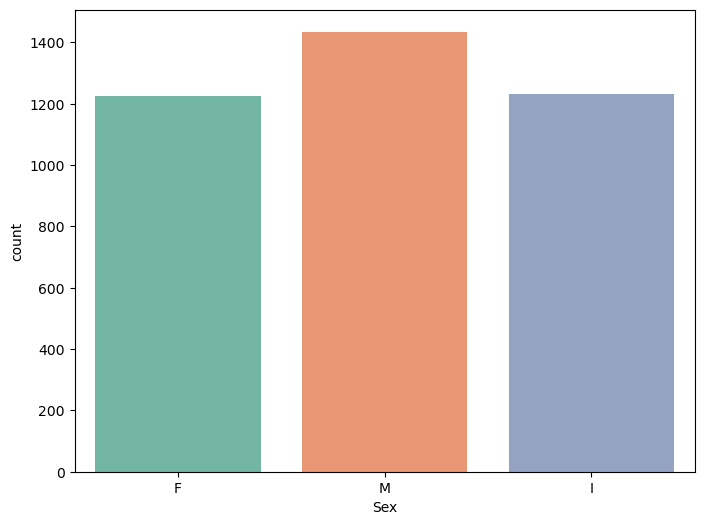

In [6]:
# Столбиковая диаграмма количества крабов по полу
sns.set_palette('Set2')
plt.figure(figsize=(8,6))
sns.countplot(x = df['Sex'])

plt.show()

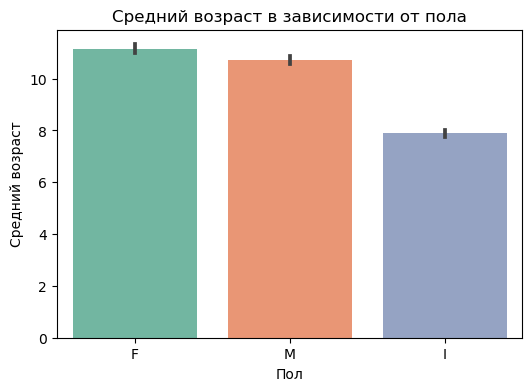

In [7]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Age', data=df)

plt.title('Средний возраст в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Средний возраст')

plt.show()

Закодируем категориальный признак

One-Hot кодирование

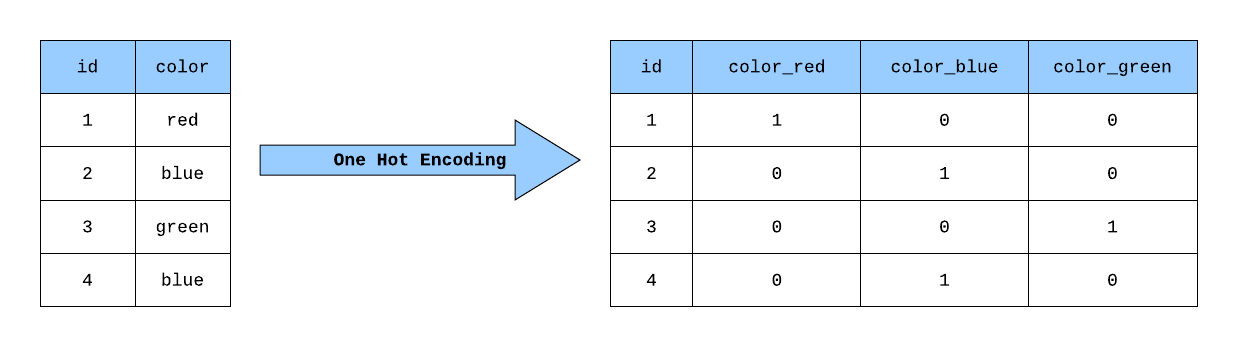

In [8]:
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first = True, dtype = int)

df_encoded.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


In [9]:
df_encoded.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_I', 'Sex_M'],
      dtype='object')

Сформируем матрицу объект-признак `X` и вектор целевой переменной `y`.

In [10]:
X = df_encoded.drop(['Age'], axis=1)
y = df_encoded['Age']

Разобъем данные на обучающую и тестовую части.

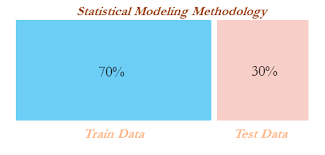

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((2919, 9), (974, 9))

### Обучим базовую линейную регрессию

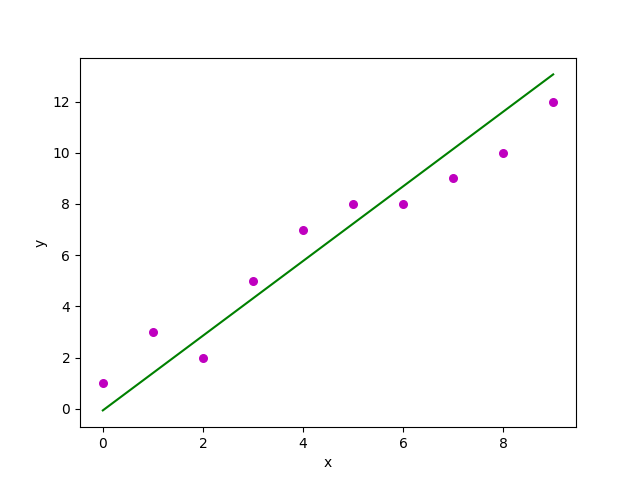

Линейная регрессия прогнозирует целевую переменную по формуле

$$a(x) = w_0 + w_1x_1 + w_2x_2 + ... +w_dx_d,$$
где

* $x_1, x_2, ..., x_d$ - признаки объекта

* $w_0, w_1, ..., w_d$ - веса модели (подбираются автоматически в процессе обучения)

* $a(x)$ - прогноз целевой переменной на объекте $x$.

In [12]:

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Оценим качество прогноза

### Метрики качества в задаче регрессии

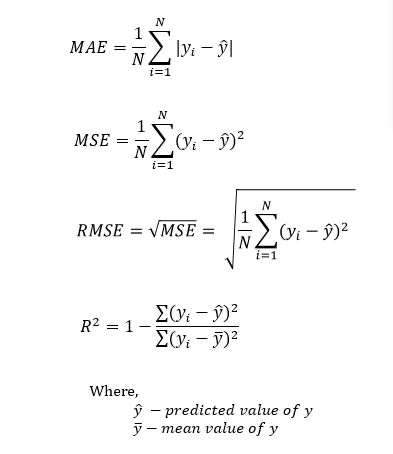

In [13]:
y_pred = model.predict(X_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 =', r2_score(y_test, y_pred))

RMSE = 2.182838359974488
R2 = 0.5192632383282018


Есть ли переобучение? **-Нет**

In [14]:
y_pred_train = model.predict(X_train)
r2_score(y_train, y_pred_train)

0.5402220860276097

### Обработка выбросов

Оценим числовые характеристики крабов. Выведем результаты описательной статистики

In [15]:
df_encoded.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.00000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,0.316722,0.36861
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,0.465258,0.48249
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.00000
5%,0.737500,0.550000,0.187500,3.566367,1.474174,0.773941,1.091456,6.000000,0.000000,0.00000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,0.000000,0.00000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000,0.000000,0.00000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,1.000000,1.00000
95%,1.725000,1.362500,0.500000,48.089257,20.961620,10.707606,13.607760,16.000000,1.000000,1.00000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,1.000000,1.00000


Подозрительные столбцы: Height, Weight, Shell Weight (и может быть другие)

Построим гистограммы распределения и диаграммы размаха числовых признаков

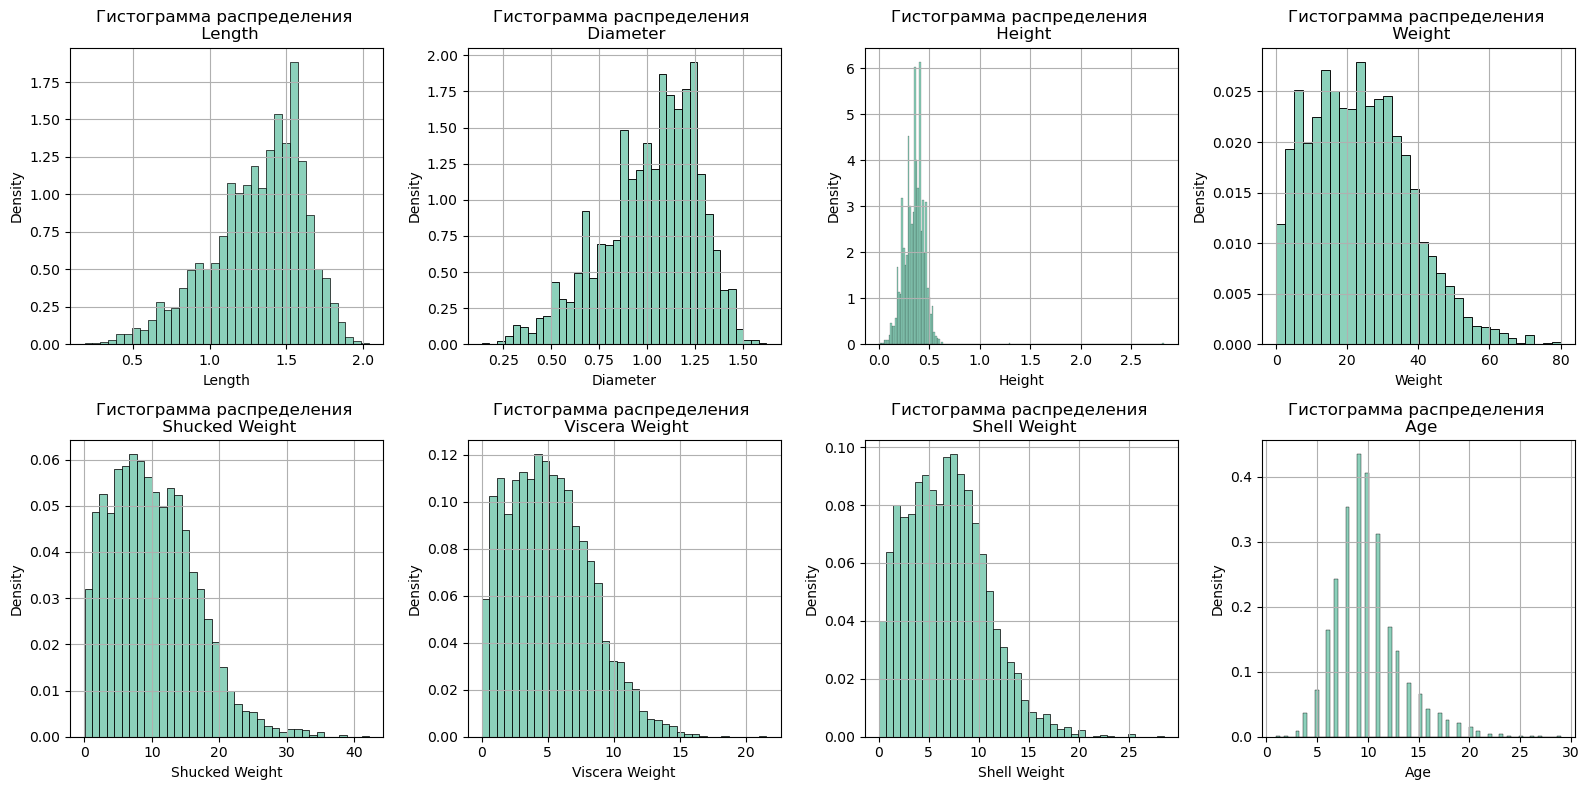

In [16]:
# Гистограммы распределения всех количественных признаков датасета df
num_col = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']

fig = plt.figure(figsize = (16,8))
for i, v in enumerate(num_col):
    axes = fig.add_subplot(2, 4, i+1)
    plt.title(f"Гистограмма распределения \n {v}", fontsize=12)
    sns.histplot(df_encoded[v], stat='density', ax = axes)
    plt.xlabel(v)
    plt.grid()
    plt.tight_layout()

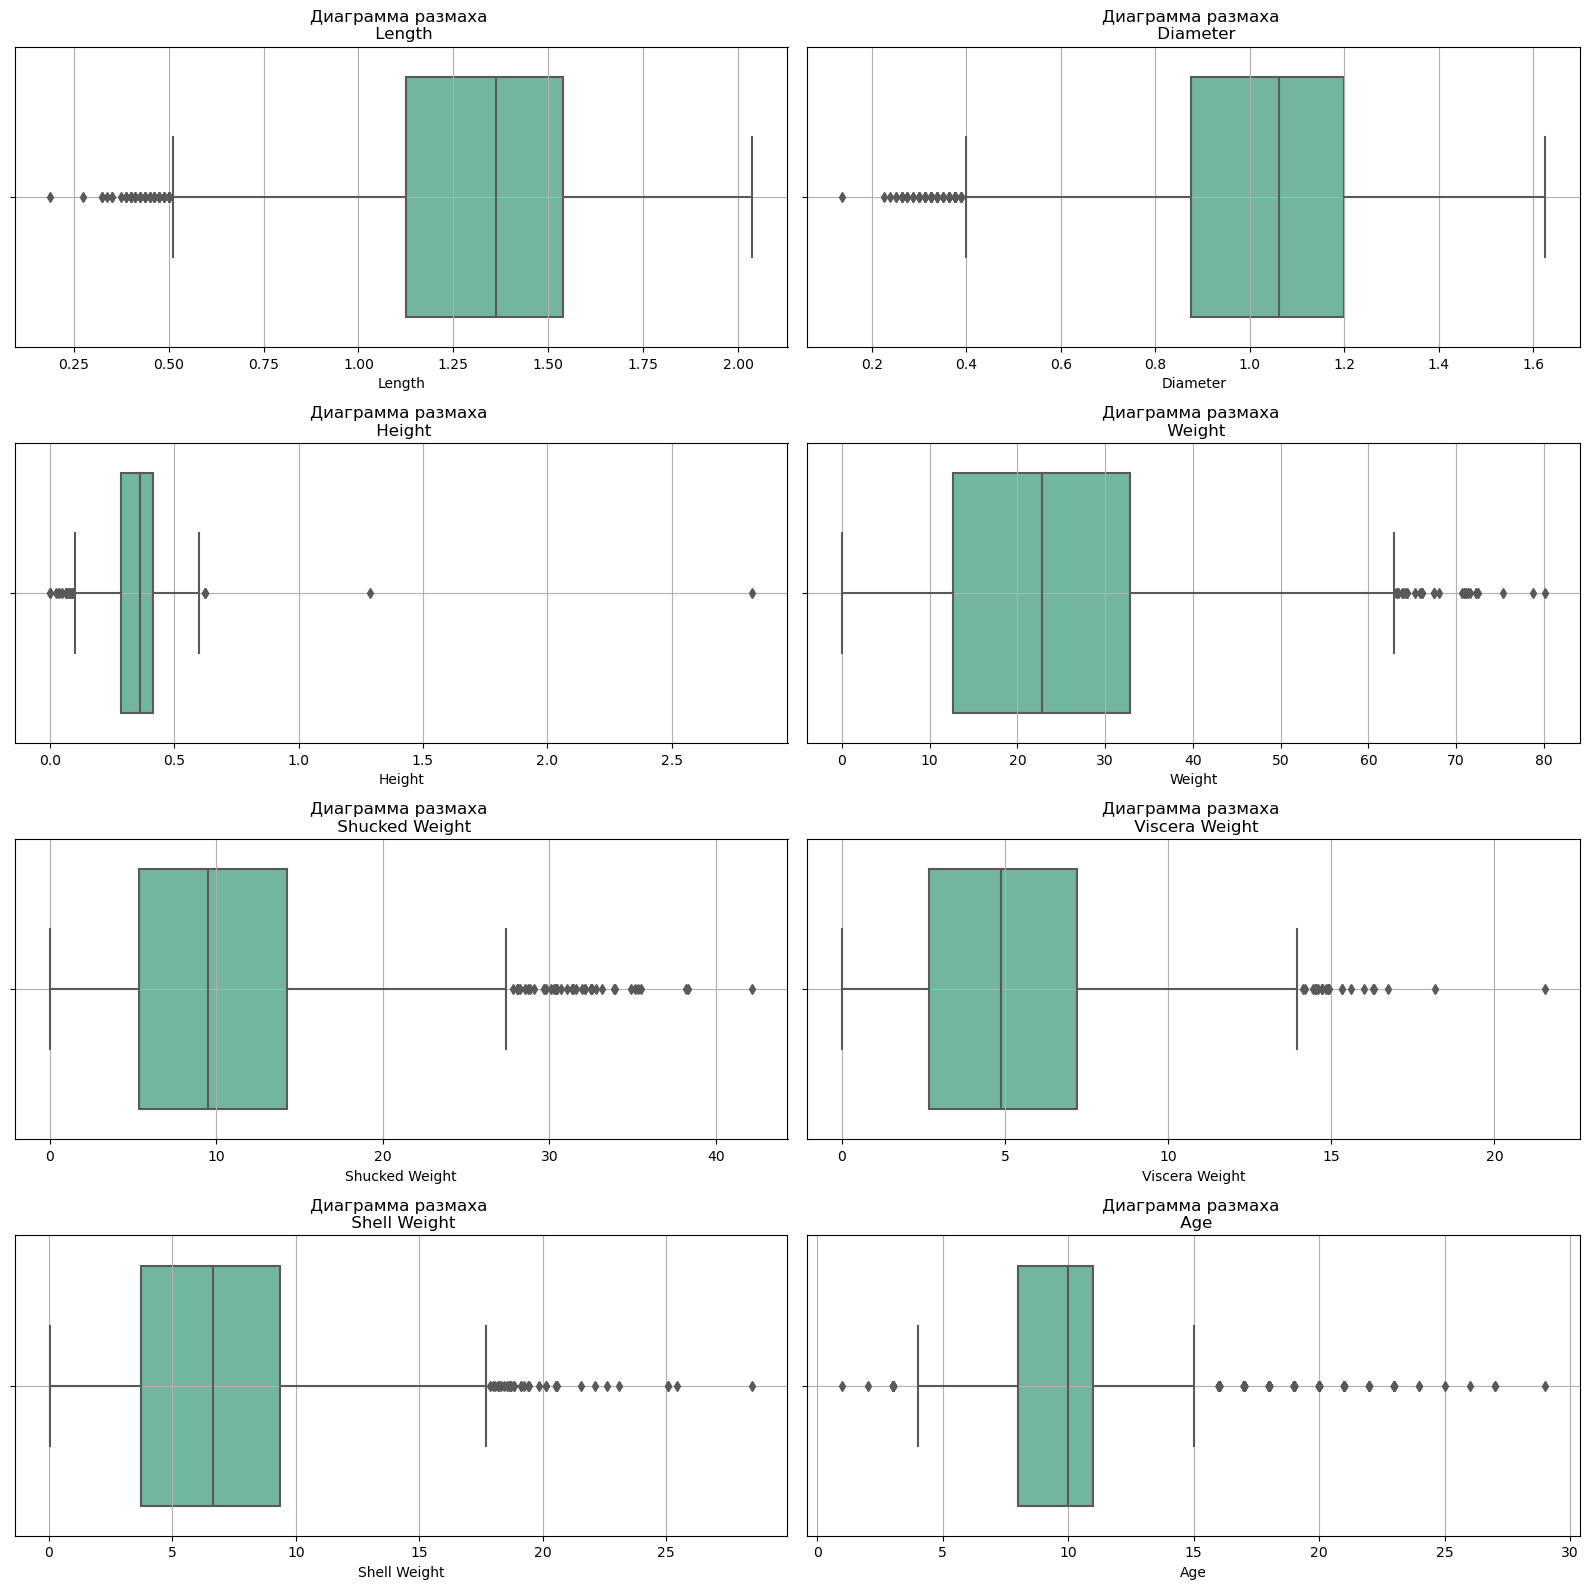

In [17]:
# Диаграммы размаха всех количественных признаков датасета df


fig = plt.figure(figsize = (16,16))
for i, v in enumerate(num_col):
    axes = fig.add_subplot(4, 2, i+1)
    plt.title(f"Диаграмма размаха \n {v}", fontsize=12)
    sns.boxplot(x = df_encoded[v], ax = axes)
    plt.xlabel(v)
    plt.grid()
    plt.tight_layout()


Изучим распределения признаков с помощью диаграмм рассеяния. Диаграммы рассеяния можно изобразить с помощью метода `pairplot` библиотеки `seaborn`.

Можем добавить третье измерение на диаграммы рассеяния в виде параметра `hue`.

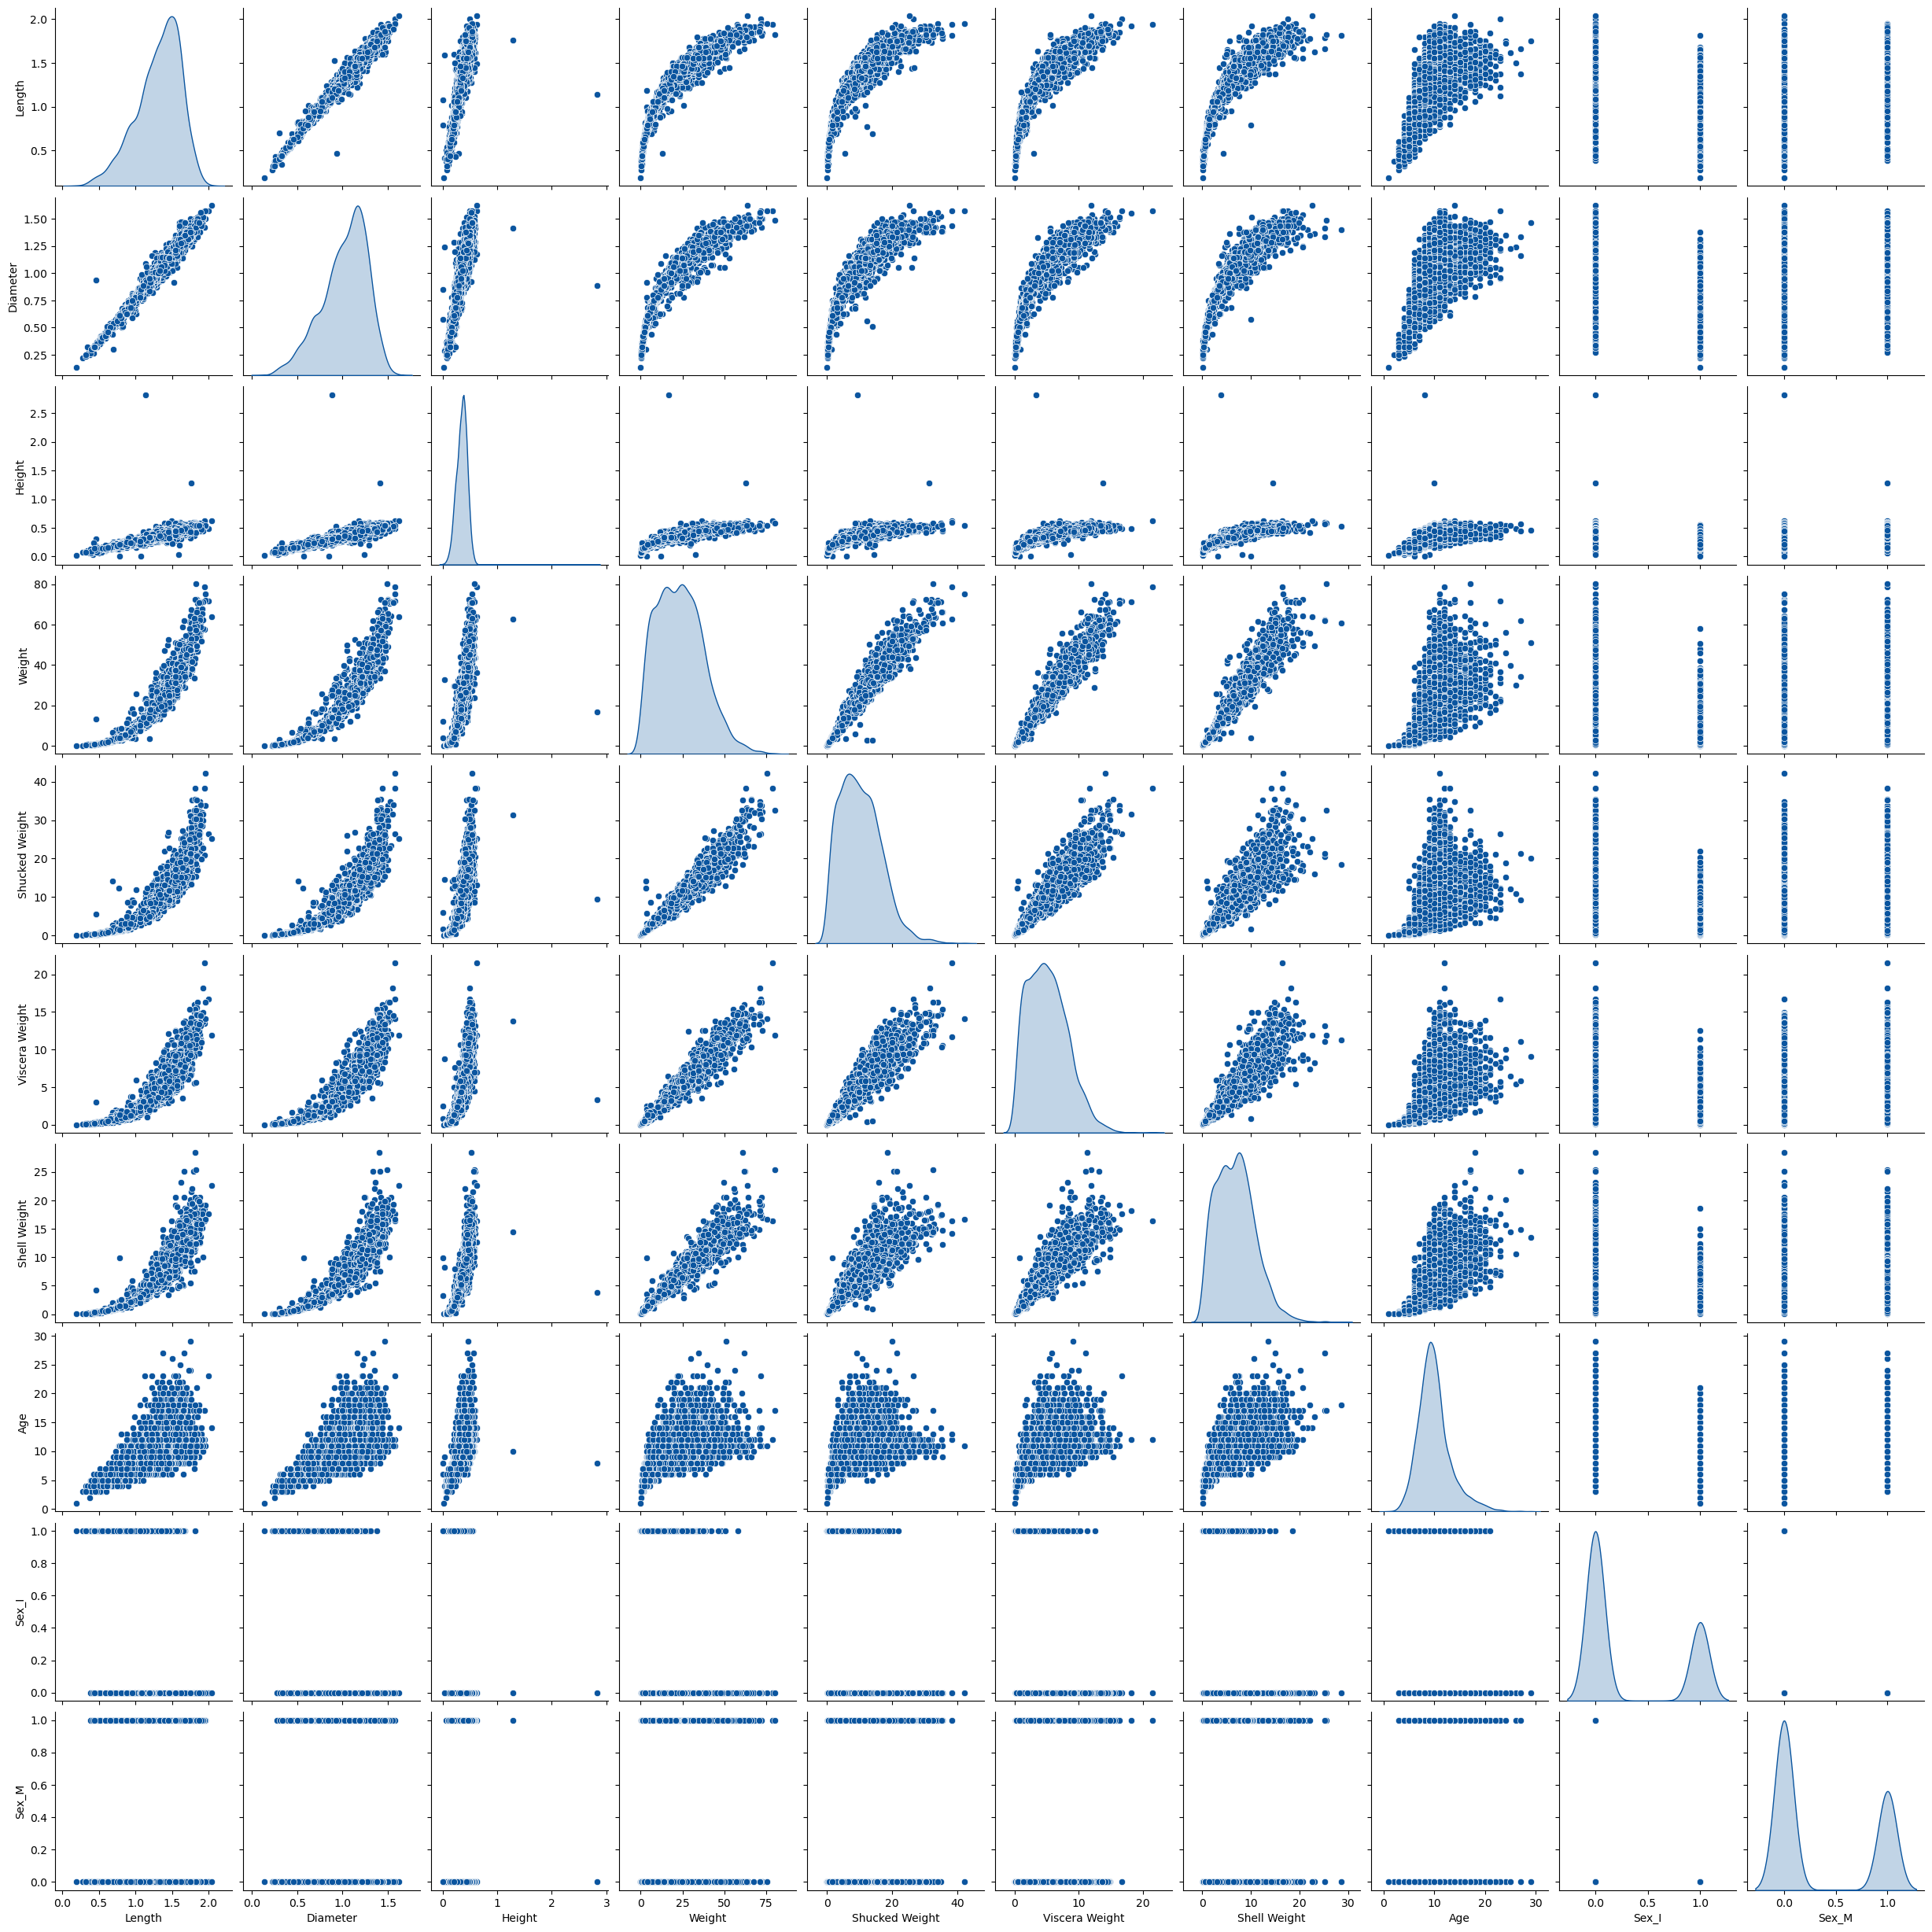

In [18]:
sns.set_palette('Blues_r')

sns.pairplot(df_encoded, diag_kind='kde')

plt.show()

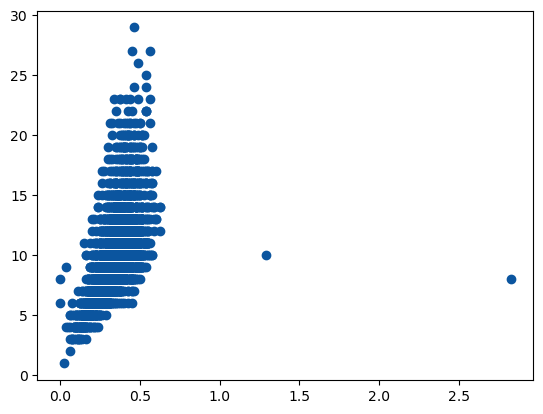

In [19]:
sns.set_palette('Blues_r')
plt.scatter(df_encoded['Height'], df_encoded['Age'])
plt.show()

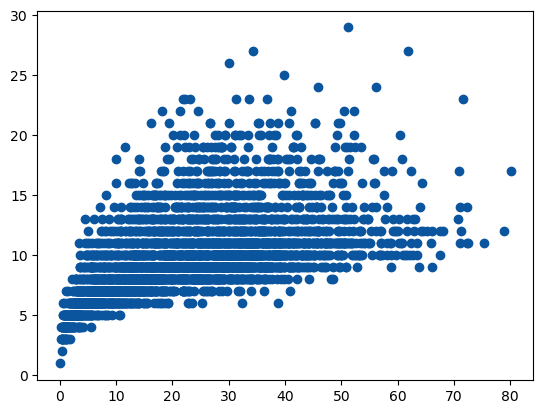

In [20]:
plt.scatter(df_encoded['Weight'], df_encoded['Age'])
plt.show()

In [21]:
np.percentile(df_encoded['Shell Weight'], 99), df_encoded['Shell Weight'].max()

(17.57669, 28.4912475)

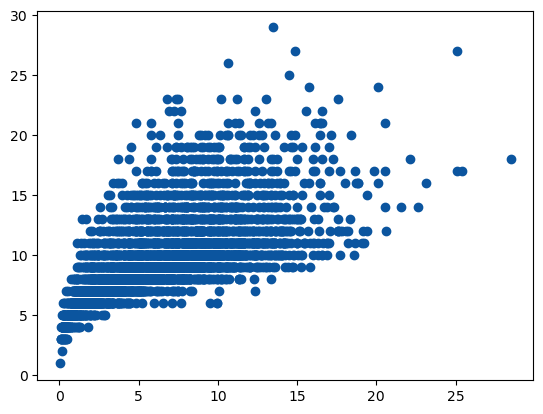

In [22]:
plt.scatter(df_encoded['Shell Weight'], df_encoded['Age'])
plt.show()

Оставим только объекты с Height < 1.

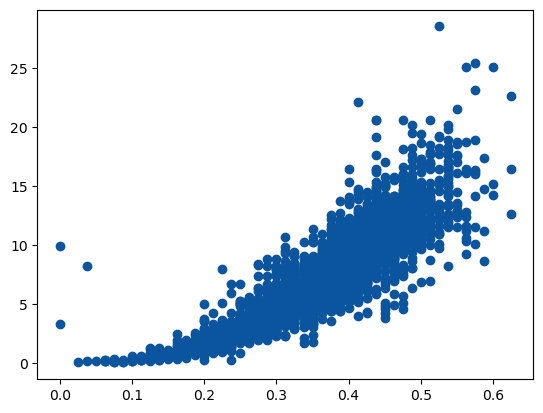

In [23]:
df_clean = df_encoded.copy()
df_clean = df_clean[df_clean['Height'] < 1]

plt.scatter(df_clean['Height'], df_clean['Shell Weight'])
plt.show()

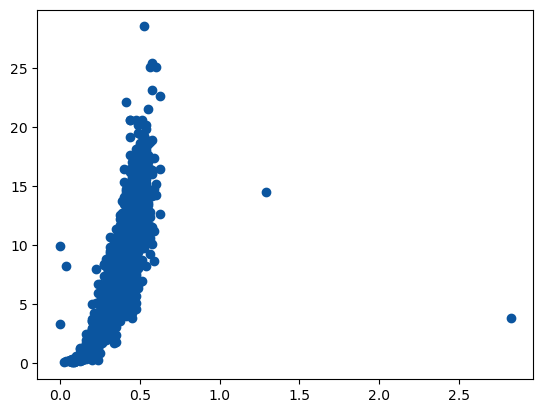

In [24]:
df_clean_1 = df_encoded.copy()

plt.scatter(df_clean_1['Height'], df_clean_1['Shell Weight'])
plt.show()

In [25]:
X_clean = df_clean.drop(['Age'], axis=1)
y_clean = df_clean['Age']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.25, random_state=42)

In [26]:
model.fit(X_train_clean, y_train_clean)

pred_enc_clean = model.predict(X_test_clean)

In [27]:
r2_score(y_test_clean, pred_enc_clean)

0.5360536896988823

Качество немного возросло.

### Изучение зависимостей целевой переменной от признаков

Изучим корреляционные связи

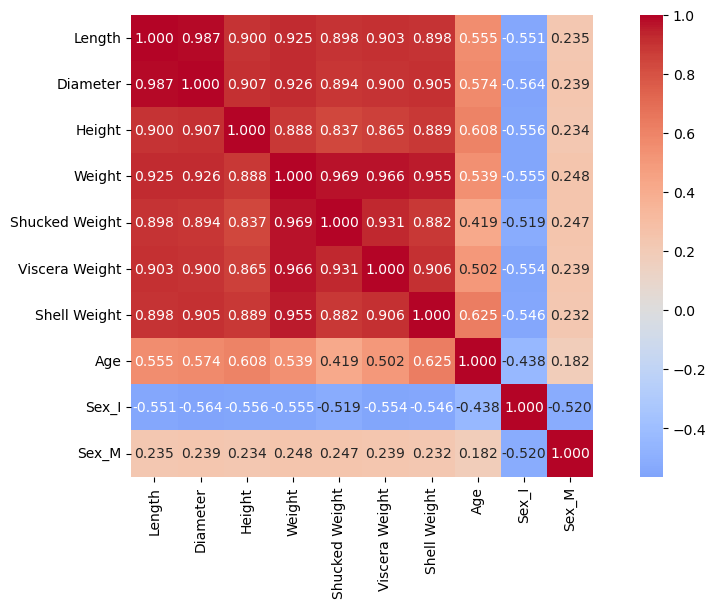

In [28]:
# Корреляция Пирсона
corr_p = df_clean.corr(method = 'pearson')
plt.figure(figsize=(12,6))
sns.heatmap(corr_p, annot = True, cmap = 'coolwarm', center = 0, fmt = '.3f', square = True)
plt.show()

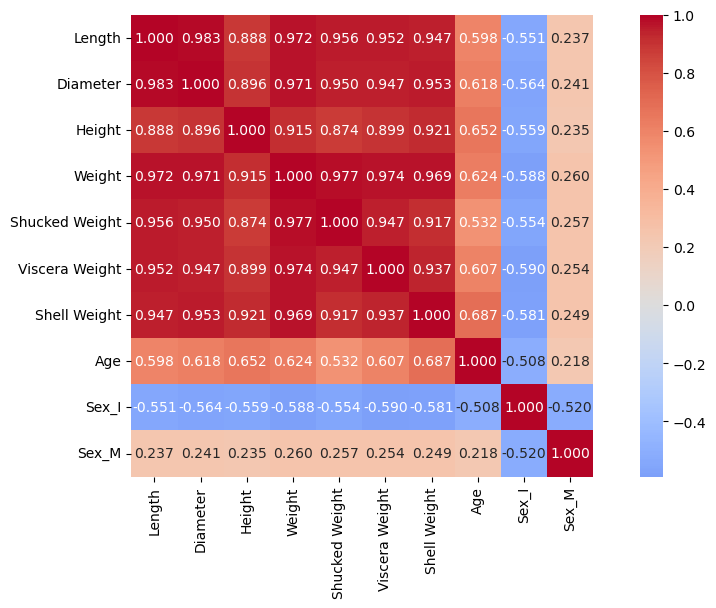

In [29]:
# Корреляция Спирмена
corr_s = df_clean.corr(method = 'spearman')
plt.figure(figsize=(12,6))
sns.heatmap(corr_s, annot = True, cmap = 'coolwarm', center = 0, fmt = '.3f', square = True)
plt.show()

Мы видим некоторые нелинейные зависимости - это видно и по графикам, и по соотношение корреляций Пирсона и Спирмена.

Сделаем логарифмическое преобразование и снова посмотрим на вид зависимостей.

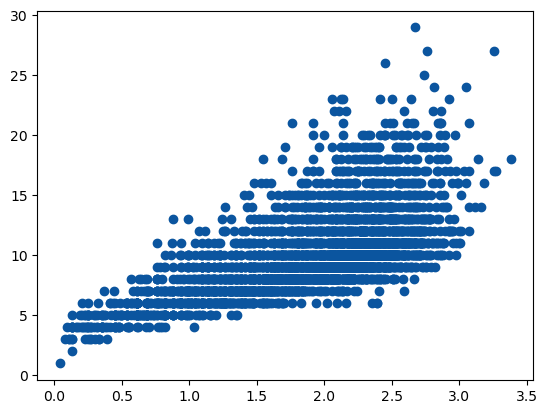

In [30]:
plt.scatter(np.log1p(df_clean['Shell Weight']), df_clean['Age'])
plt.show()

In [31]:
np.corrcoef(df_clean['Shell Weight'], df_clean['Age'])

array([[1.        , 0.62545338],
       [0.62545338, 1.        ]])

In [32]:
np.corrcoef(df_clean['Shell Weight'], df_clean['Age'])[0][1]

0.6254533763469959

Функция **corrcoef** в Numpy вычисляет коэффициент корреляции Пирсона, который является мерой того, как связаны две переменные.

In [33]:
np.corrcoef(df_clean['Shell Weight'] ** 0.5, df_clean['Age'])[0][1]

0.6461004194337644

In [34]:
np.corrcoef(np.log1p(df_clean['Shell Weight']), df_clean['Age'])[0][1]

0.6444551742048401

In [35]:
def get_dependency(column):
    print(np.corrcoef(df_clean[column], df_clean['Age'])[0][1])
    print(np.corrcoef(df_clean[column] ** 0.5, df_clean['Age'])[0][1])
    print(np.corrcoef(np.log1p(df_clean[column]), df_clean['Age'])[0][1])

for c in df_clean.columns:
    print(c)
    get_dependency(c)

Length
0.5550887258504872
0.55978460412628
0.560102474590581
Diameter
0.5739869150824956
0.577520850210472
0.577548754015561
Height
0.6075020940967498
0.6060705706621877
0.6093475476613261
Weight
0.5393245343763383
0.5755337380944262
0.5864536923286909
Shucked Weight
0.419363543107234
0.4751181087036616
0.5019798991199763
Viscera Weight
0.5017731032932152
0.5464194735876934
0.5597690712398575
Shell Weight
0.6254533763469959
0.6461004194337644
0.6444551742048401
Age
1.0
0.9919083274989077
0.973087831594442
Sex_I
-0.4381138339779379
-0.4381138339779379
-0.4381138339779376
Sex_M
0.1822773969509369
0.1822773969509369
0.18227739695093678


In [36]:
df_clean['log Weight'] = np.log1p(df_clean['Weight'])
df_clean['log Shucked Weight'] = np.log1p(df_clean['Shucked Weight'])
df_clean['log Viscera Weight'] = np.log1p(df_clean['Viscera Weight'])

df_clean.drop(['Weight', 'Shucked Weight', 'Viscera Weight'], axis=1, inplace=True)

In [37]:
df_clean.head()

,Length,Diameter,Height,Shell Weight,Age,Sex_I,Sex_M,log Weight,log Shucked Weight,log Viscera Weight
0,1.4375,1.1750,0.4125,6.747181,9,0,0,3.243987,2.590170,1.884772
1,0.8875,0.6500,0.2125,1.559222,6,0,1,1.856389,1.192804,0.864977
2,1.0375,0.7750,0.2500,2.764076,6,1,0,2.191881,1.442638,0.956183
3,1.1750,0.8875,0.2500,5.244657,10,0,0,2.672781,1.748946,1.188494
4,0.8875,0.6625,0.2125,1.700970,6,1,0,2.067255,1.494844,0.911619


In [38]:
X_log = df_clean.drop(['Age'], axis=1)
y_log = df_clean['Age']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.25, random_state=42)

In [39]:
model.fit(X_train_log, y_train_log)

pred_log_clean = model.predict(X_test_log)

r2_score(y_test_log, pred_log_clean)

0.5518882667932137

После логарфмирования некоторых признаков удалось увеличить качество модели до 0.552.

### Задание для самостоятельной работы
### Изучение попарных зависимостей - полиномиальные признаки

#### 1. Постройте модель линейной регрессии на полиномиальных признаках. Оцените качество модели, сравните полученный результат с базовой моделью.

In [40]:
# Формируем полиномиальные признаки до 2 порядка
poly = PolynomialFeatures(degree=2)

#X_train_poly = poly.fit_transform(X_train_clean, columns = poly.get_feature_names_out())
X_train_poly = pd.DataFrame(poly.fit_transform(X_train_clean), columns = poly.get_feature_names_out())
#X_test_poly = poly.transform(X_test_clean, columns = poly.get_feature_names_out())
X_test_poly = pd.DataFrame(poly.fit_transform(X_test_clean), columns = poly.get_feature_names_out())

In [41]:
poly

PolynomialFeatures()

In [42]:
columns = poly.get_feature_names_out()
columns

array(['1', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Sex_I', 'Sex_M', 'Length^2',
       'Length Diameter', 'Length Height', 'Length Weight',
       'Length Shucked Weight', 'Length Viscera Weight',
       'Length Shell Weight', 'Length Sex_I', 'Length Sex_M',
       'Diameter^2', 'Diameter Height', 'Diameter Weight',
       'Diameter Shucked Weight', 'Diameter Viscera Weight',
       'Diameter Shell Weight', 'Diameter Sex_I', 'Diameter Sex_M',
       'Height^2', 'Height Weight', 'Height Shucked Weight',
       'Height Viscera Weight', 'Height Shell Weight', 'Height Sex_I',
       'Height Sex_M', 'Weight^2', 'Weight Shucked Weight',
       'Weight Viscera Weight', 'Weight Shell Weight', 'Weight Sex_I',
       'Weight Sex_M', 'Shucked Weight^2',
       'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight',
       'Shucked Weight Sex_I', 'Shucked Weight Sex_M', 'Viscera Weight^2',
       'Viscera Weight Shell Weight', 

In [43]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [44]:
model.fit(X_train_poly, y_train_clean)

LinearRegression()

In [45]:
y_pred_poly = model.predict(X_test_poly)

In [46]:
mse = mean_squared_error(y_test_clean, y_pred_poly)
mse

4.732620984559669

In [47]:
rmse = np.sqrt(mse)
rmse

2.175458798635283

In [48]:
r2 = r2_score(y_test_clean, y_pred_poly)
r2

0.5747358078909816

In [49]:
r2 = model.score(X_test_poly, y_test_clean)
r2

0.5747358078909816

In [50]:
f'Poly LinearRegression: RMSE = {np.sqrt(mean_squared_error(y_test_clean, y_pred_poly))}, R2 = {r2_score(y_test_clean, y_pred_poly)}'

'Poly LinearRegression: RMSE = 2.175458798635283, R2 = 0.5747358078909816'

Вывод - качество модели оказалось лучше. R2 полиномиальной модели - **0.575**, R2 логарифмированной модели - **0.552**

#### Анализ коэффициентов модели

In [51]:
X_train_clean.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Sex_I', 'Sex_M'],
      dtype='object')

In [52]:
model.coef_

array([-1.03293950e-10,  1.31001824e+01,  1.34727161e+00, -1.08137779e+01,
        1.47088440e-02, -1.19548665e+00,  1.15074261e+00,  1.12124656e+00,
       -5.48481782e-01, -5.79269244e-01, -1.02067844e+01,  1.92840934e+01,
       -3.35673540e+01,  2.84366042e-01,  3.81115631e-01, -1.42394420e+00,
       -1.44501950e-01, -2.60866885e+00,  3.12293379e+00, -2.10265582e+01,
        5.51403994e+01,  4.31778872e-01, -2.95521085e-01,  2.77227768e-02,
       -9.47782313e-01, -6.51494068e-01, -3.41301744e+00,  1.57876834e+01,
        3.32241035e-01, -1.39312020e+00, -8.22390307e-01,  1.61058844e-01,
        8.85842654e+00,  6.18104067e-01, -3.54570548e-03, -5.18892397e-02,
        2.41324938e-02,  1.19757465e-02,  7.03067328e-02,  8.64252372e-03,
        7.04650837e-02,  2.11779537e-02,  3.15493627e-02,  1.95722422e-01,
        7.64119805e-03,  2.15228998e-02, -3.82942460e-02, -1.97066272e-01,
       -1.97863915e-01, -1.11491050e-02, -8.85424133e-02,  1.50446920e-01,
       -5.48481782e-01,  

In [53]:
len(model.coef_)

55

In [54]:
X_train_poly.shape

(2918, 55)

In [55]:
y_train_clean.shape

(2918,)

#### 2. Рассмотрите модели Ridge и/или Lasso для улучшения качества базовой модели регресии. Как изменилось качество построенной модели?

**Ridge регрессия**

In [56]:
RidgeR = Ridge().fit(X_train_poly, y_train_clean)

y_predict = RidgeR.predict(X_test_poly)

f'Poly Rigde: RMSE = {np.sqrt(mean_squared_error(y_test_clean, y_predict))}, R2 = {r2_score(y_test_clean, y_predict)}'

'Poly Rigde: RMSE = 2.1677601624167666, R2 = 0.5777403798799612'

In [57]:
# Коэффициенты регрессии
coeff_RidgeR = pd.DataFrame(
     {'Признак' : X_train_poly.columns,
        'Важность': np.abs(RidgeR.coef_)
     }).sort_values(by ='Важность',  ascending = False)

In [58]:
coeff_RidgeR[:10]

,Признак,Важность
32,Height Sex_I,2.899379
1,Length,2.732453
3,Height,2.171954
2,Diameter,1.930523
12,Length Height,1.899182
20,Diameter Height,1.659949
27,Height^2,1.403319
29,Height Shucked Weight,1.387797
18,Length Sex_M,1.369245
15,Length Viscera Weight,1.367107


**Lasso регрессия**

In [59]:
LassoR = Lasso().fit(X_train_poly, y_train_clean)

y_predict = LassoR.predict(X_test_poly)

f'Poly Rigde: RMSE = {np.sqrt(mean_squared_error(y_test_clean, y_predict))}, R2 = {r2_score(y_test_clean, y_predict)}'

'Poly Rigde: RMSE = 2.47880359353659, R2 = 0.4478700255517475'

In [60]:
# Коэффициенты регрессии
coeff_Lasso = pd.DataFrame(
     {'Признак' : X_train_poly.columns,
        'Важность': np.abs(LassoR.coef_)
     }).sort_values(by ='Важность',  ascending = False)

In [61]:
coeff_Lasso[coeff_Lasso['Важность'] > 0.00001]

,Признак,Важность
4,Weight,0.187614
35,Weight Shucked Weight,0.011542
37,Weight Shell Weight,0.009827
39,Weight Sex_M,0.005128
36,Weight Viscera Weight,0.002648
42,Shucked Weight Shell Weight,0.001995
34,Weight^2,0.001812


**Вывод**

Улучшение качества модели можем заметить в Ridge регресии, показатель R2 повысился до **0.578**

#### 3. Проведите отбор признаков статистическими методами (с помощью F-теста). Как изменилось качество построенной модели? Сколько признаков необходимо использовать для "лучшей" модели? Какие это признаки?

Чтобы отобрать признаки, используем `SelectKBest` несколько раз с помощью цикла и определим, при каком количестве признаков коэффициент детерминации будет наибольшим. Для линейной регрессии лучше использовать статистический тест `f_regression`, поскольку оцениваем линейное влияние входных признаков на целевой.

In [62]:
len(X_train_poly.columns)

55

In [63]:
r2 = []
for i in range(len(X_train_poly.columns)):
    # объявляем селектор
    # он будет подбирать разное количество признаков за счёт цикла
    selector = SelectKBest(f_regression, k = i+1)
    selector.fit(X_train_poly, y_train_clean)

    # сохраняем названия признаков в переменную features_names
    features_names = selector.get_feature_names_out()

    # Отбираем для обучения k признаков
    #X_train_new = X_train_poly[list(features_names)]
    #X_test_new = X_train_poly[list(features_names)]
    X_train_new = selector.transform(X_train_poly)
    X_test_new = selector.transform(X_test_poly)

    # инициализируем и обучаем модель
    model_poly_stat = LinearRegression().fit(X_train_new, y_train_clean)

    R2_new = r2_score(y_test_clean, model_poly_stat.predict(X_test_new))


    r2.append(R2_new)

    print('Количество признаков', i+1, 'R2 =', R2_new)

Количество признаков 1 R2 = 0.3883675561329498
Количество признаков 2 R2 = 0.39309138088276896
Количество признаков 3 R2 = 0.4122358811196045
Количество признаков 4 R2 = 0.46016305787330225
Количество признаков 5 R2 = 0.46174273220565465
Количество признаков 6 R2 = 0.46183930721390976
Количество признаков 7 R2 = 0.4785895765230249
Количество признаков 8 R2 = 0.47899330858472633
Количество признаков 9 R2 = 0.477898575434216
Количество признаков 10 R2 = 0.47814612911374943
Количество признаков 11 R2 = 0.47494705434236073
Количество признаков 12 R2 = 0.47448099106288477
Количество признаков 13 R2 = 0.4746945059032158
Количество признаков 14 R2 = 0.47732626871147943
Количество признаков 15 R2 = 0.47731178492060067
Количество признаков 16 R2 = 0.4762177385020483
Количество признаков 17 R2 = 0.48753376034841056
Количество признаков 18 R2 = 0.48801380306843645
Количество признаков 19 R2 = 0.486028093354288
Количество признаков 20 R2 = 0.486003288363667
Количество признаков 21 R2 = 0.486409933

In [64]:
# Коэффициенты регрессии
coeff_poly = pd.DataFrame(
     {'Признак' : X_train_poly.columns,
        'Важность': np.abs(model_poly_stat.coef_)
     }).sort_values(by ='Важность',  ascending = False)
coeff_poly[:10]

,Признак,Важность
20,Diameter Height,55.140399
12,Length Height,33.567354
19,Diameter^2,21.026558
11,Length Diameter,19.284093
27,Height^2,15.787683
1,Length,13.100182
3,Height,10.813778
10,Length^2,10.206784
32,Height Sex_I,8.858427
26,Diameter Sex_M,3.413017


In [76]:
def find_best_features(X_train, y_train, model, coeff_poly):
    results = []

    # Итеративно выбираем от 1 до всех признаков
    for n_features in range(1, len(coeff_poly) + 1):
        top_features = coeff_poly['Признак'][:n_features]
        X_subset = X_train[top_features]

        # Оцениваем качество модели с выбранными признаками
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        results.append((n_features, scores.mean()))

    # Находим оптимальное число признаков
    results_df = pd.DataFrame(results, columns=['n_features', 'mean_score'])
    best_n = results_df.loc[results_df['mean_score'].idxmax(), 'n_features']

    # Возвращаем оптимальное количество признаков и их названия
    best_features = coeff_poly['Признак'][:int(best_n)].tolist()
    return best_n, best_features, results_df


In [77]:
from sklearn.model_selection import cross_val_score
best_n, best_features, results_df = find_best_features(X_train_poly, y_train_clean, model_poly_stat, coeff_poly)

In [78]:
best_n

45

In [79]:
best_features

['Diameter Height',
 'Length Height',
 'Diameter^2',
 'Length Diameter',
 'Height^2',
 'Length',
 'Height',
 'Length^2',
 'Height Sex_I',
 'Diameter Sex_M',
 'Length Sex_M',
 'Length Sex_I',
 'Length Viscera Weight',
 'Height Shucked Weight',
 'Diameter',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Diameter Shell Weight',
 'Height Viscera Weight',
 'Diameter Sex_I',
 'Height Sex_M',
 'Sex_M^2',
 'Sex_M',
 'Sex_I^2',
 'Sex_I',
 'Diameter Weight',
 'Length Shucked Weight',
 'Height Weight',
 'Diameter Shucked Weight',
 'Length Weight',
 'Viscera Weight Sex_M',
 'Viscera Weight Sex_I',
 'Shucked Weight Sex_I',
 'Height Shell Weight',
 'Shell Weight Sex_M',
 'Length Shell Weight',
 'Shell Weight Sex_I',
 'Shucked Weight^2',
 'Weight Sex_I',
 'Weight Shucked Weight',
 'Viscera Weight Shell Weight',
 'Shucked Weight Shell Weight',
 'Diameter Viscera Weight',
 'Weight Viscera Weight']

In [83]:
results_df

,n_features,mean_score
0,1,0.348906
1,2,0.352518
2,3,0.355688
3,4,0.355585
4,5,0.359578
5,6,0.390367
6,7,0.394228
7,8,0.395240
8,9,0.402468
9,10,0.402199


#### 4. Выберите "лучшую" модель для прогнозирования возраста краба от его размеров и весовых характеристик. Сделайте вывод.

Лучшая модель - Ridge регрессия, основывался на r2 и rmse метриках